In [1]:
import numpy as np
import pandas as pd

In [2]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [3]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3658,ham,Wait.i will come out.. &lt;#&gt; min:),NaN,NaN,NaN
2125,ham,"Sorry im getting up now, feel really bad- tota...",NaN,NaN,NaN
2916,ham,Yes. that will be fine. Love you. Be safe.,NaN,NaN,NaN
2823,ham,No need to buy lunch for me.. I eat maggi mee..,NaN,NaN,NaN
1213,ham,"Yeah, probably but not sure. Ilol let u know, ...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
4148,ham,Haven't found a way to get another app for you...
2000,ham,But i'll b going 2 sch on mon. My sis need 2 t...
151,ham,Yup i thk cine is better cos no need 2 go down...
2294,spam,You have 1 new message. Please call 08718738034.
424,ham,Send this to ur friends and receive something ...


In [8]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
2751,ham,Play w computer? Aiyah i tok 2 u lor?
3380,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4314,ham,Captain is in our room:)
522,ham,Were gonna go get some tacos
5089,ham,What type of stuff do you sing?


In [15]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\python 3.10\python.exe -m pip install --upgrade pip' command.


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
df.duplicated().sum()

403

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
 df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## EDA

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

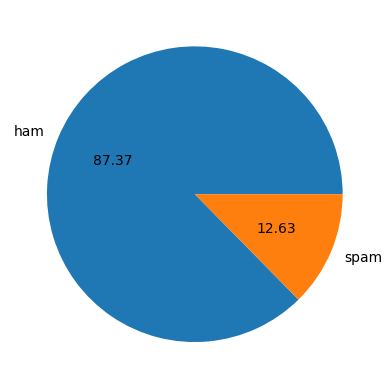

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [26]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 104.4 kB/s eta 0:00:00
     -------------------------------------- 96.6/96.6 KB 184.1 kB/s eta 0:00:00
     -------------------------------------- 78.5/78.5 KB 150.6 kB/s eta 0:00:00
     ------------------------------------ 267.7/267.7 KB 120.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\python 3.10\python.exe -m pip install --upgrade pip' command.


In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [30]:
# no of characters
df['num_char'] = df['text'].apply(len)

In [31]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
# # no of words
# df['text'].apply(lambda x:(nltk.word_tokenize(x)))
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
# no of sentences
# df['text'].apply(lambda x:(nltk.sent_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
# for ham 
df[df['target']==0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
# for spam
df[df['target']==1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [40]:
pip install seaborn


     ------------------------------------ 285.1/285.1 KB 293.0 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\user\python 3.10\python.exe -m pip install --upgrade pip' command.


In [41]:
import seaborn as sns

StopIteration: 

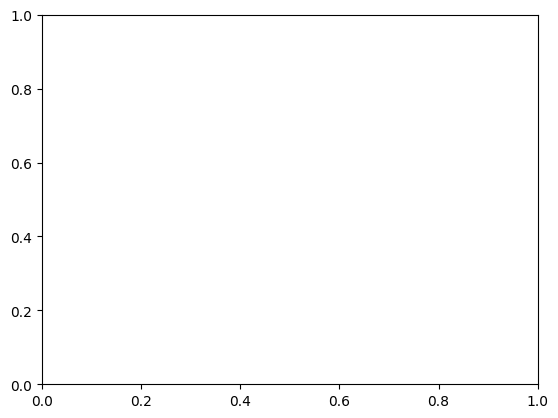

In [45]:
sns.histplot(df[df['target'] == 0]['num_char'])